# Model Evaluation & Data Preprocessing

## Data Preprocessing

📘 Definition: Data preprocessing is the set of techniques used to clean, transform, and prepare raw data into a format suitable for analysis or model training.

🔧 When to Use: Whenever raw data contains missing values, noise, inconsistent formats, or unscaled features before applying machine learning models.

🌍 Where to Use: In almost every machine learning pipeline — from text classification, image recognition, and time-series forecasting to recommender systems.

💡 Use Case: Cleaning and scaling an e-commerce dataset containing user purchase history, filling missing ages, encoding categorical variables, and normalizing transaction amounts.

⚠️ Limitations: Improper preprocessing can distort the original data distribution, leading to biased models.

✅ Advantages: Improves data quality, model accuracy, training stability, and generalization to unseen data.

❓ Why is it Used?: To transform raw, inconsistent data into a clean and standardized structure that maximizes the model’s learning potential.

### Scaling (StandardScaler, MinMaxScaler)

#### StandardScaler

📘 Definition:
StandardScaler standardizes features by removing the mean and scaling to unit variance. Each feature is transformed to have a mean of 0 and a standard deviation of 1, making data centered and comparable.

🔧 When to Use:
When features have different scales and algorithms assume normally distributed or zero-centered data, such as linear regression, logistic regression, or PCA.

🌍 Where to Use:
In gradient-based models, distance-based algorithms, and any situation where feature scale affects model performance.

💡 Use Case:
Standardizing exam scores and study hours before training a predictive model to ensure each feature contributes equally.

⚠️ Limitations:

- Sensitive to outliers, as extreme values can skew the mean and standard deviation.

- Assumes data is approximately normally distributed for optimal performance.

✅ Advantages:

- Centers data for better convergence in optimization algorithms.

- Ensures features contribute equally to distance or gradient calculations.

- Compatible with many machine learning algorithms and preprocessing pipelines.

❓ Why is it Used?:
To normalize data distribution, stabilize model training, and improve predictive performance.

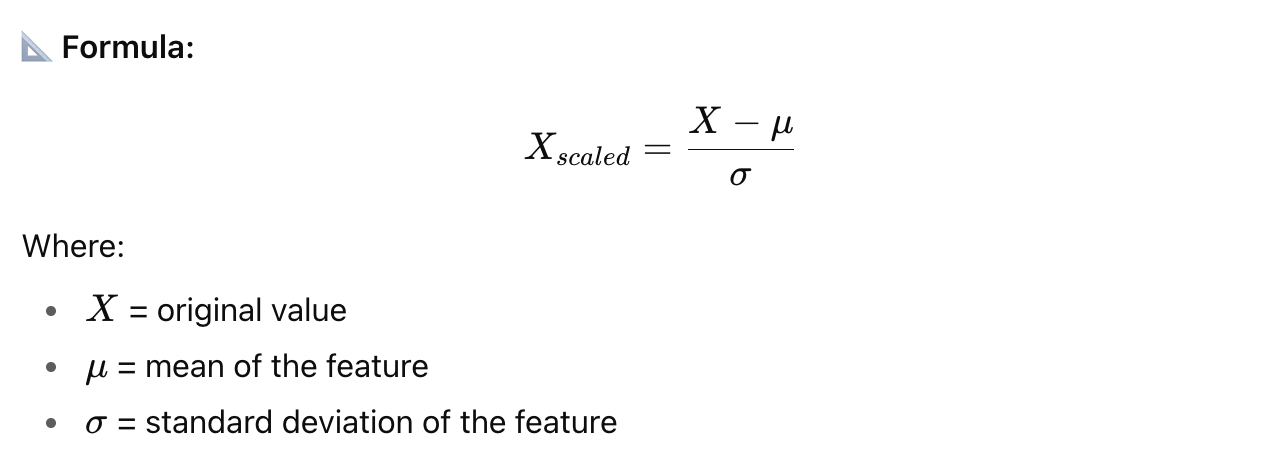

Before scaling:
 [[  1 200]
 [  2 300]
 [  3 400]]
After scaling:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


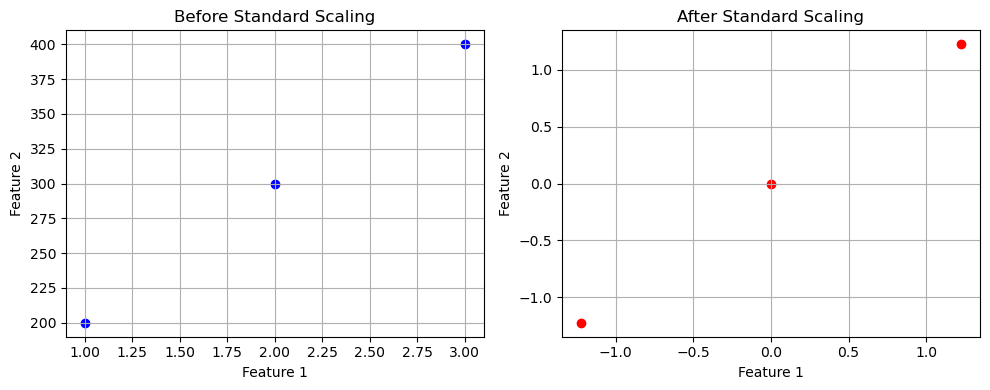

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample data
X = np.array([[1, 200],
              [2, 300],
              [3, 400]])

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before scaling:\n", X)
print("After scaling:\n", X_scaled)

# Plotting
plt.figure(figsize=(10,4))

# Before scaling
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], color='blue')
plt.title("Before Standard Scaling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# After scaling
plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], color='red')
plt.title("After Standard Scaling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()

Before scaling: Feature 1 and Feature 2 are on very different scales (1–3 vs 200–400).

After scaling: Both features are standardized (mean=0, std=1), so the spread is comparable, making them suitable for ML algorithms.

#### MinMaxScaler

MinMaxScaler transforms features to a fixed range, usually [0, 1], by scaling each feature based on its minimum and maximum values. This preserves the relative relationships between values.

🔧 When to Use:
When features need to be scaled to a specific range, especially for algorithms sensitive to absolute magnitudes like neural networks or k-means clustering.

🌍 Where to Use:
In deep learning, distance-based algorithms, or any situation where bounded input features improve model performance and convergence.

💡 Use Case:
Scaling image pixel values from [0, 255] to [0, 1] before feeding them into a convolutional neural network.

⚠️ Limitations:

- Sensitive to outliers, as min and max values are affected by extreme points.

- Does not center data around zero, which can be suboptimal for some algorithms.

✅ Advantages:

- Preserves the relationships between features while bounding them in a uniform scale.

- Useful for algorithms requiring inputs in a specific range.

- Easy to implement and interpret.

❓ Why is it Used?:
To normalize feature scales, improve convergence speed, and ensure consistent input ranges for models.

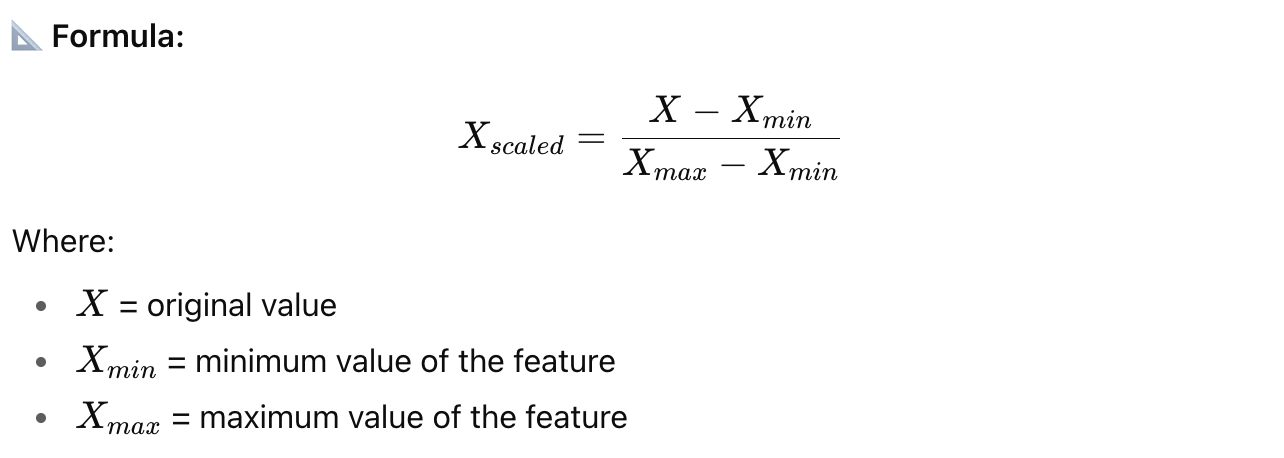

Before scaling:
 [[  1 200]
 [  2 300]
 [  3 400]]
After MinMax scaling:
 [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


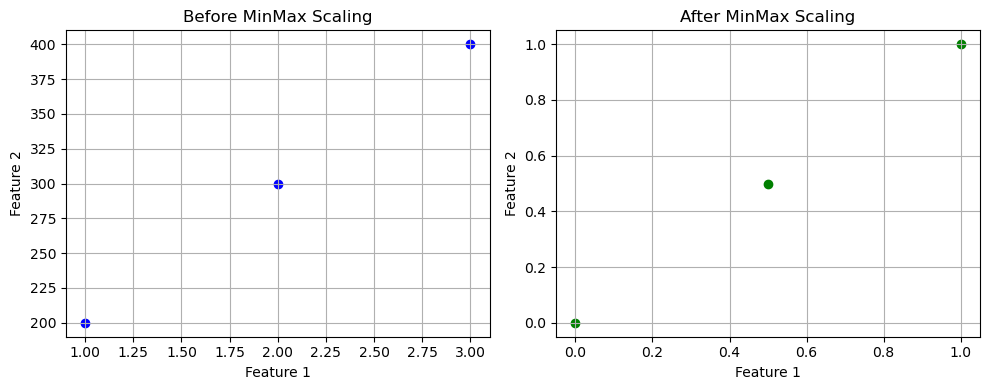

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Sample data
X = np.array([[1, 200],
              [2, 300],
              [3, 400]])

# MinMax scaling
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

print("Before scaling:\n", X)
print("After MinMax scaling:\n", X_minmax)

# Plotting
plt.figure(figsize=(10,4))

# Before scaling
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], color='blue')
plt.title("Before MinMax Scaling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# After scaling
plt.subplot(1,2,2)
plt.scatter(X_minmax[:,0], X_minmax[:,1], color='green')
plt.title("After MinMax Scaling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()

Before scaling: Feature ranges are different (1–3 vs 200–400).

After scaling: Both features are scaled to the range [0, 1], preserving their relative proportions.

### One-hot encoding

📘 Definition:
One-Hot Encoding converts categorical variables into multiple binary columns, where each column represents one category and contains a 1 if the observation belongs to that category or 0 otherwise. This allows machine learning models to process categorical data numerically without implying any ordinal relationship.

🔧 When to Use:
When dealing with nominal categorical features that have no natural order, such as colors, cities, or product types.

🌍 Where to Use:
In regression, classification, and clustering tasks where categorical variables need to be represented numerically without introducing artificial rankings.

💡 Use Case:
Encoding a City feature with values ['NY', 'LA', 'SF'] into three separate binary columns: City_NY, City_LA, City_SF.

⚠️ Limitations:

- Can significantly increase the number of features for high-cardinality variables, leading to the “curse of dimensionality.”

- May increase computational cost and memory usage.

✅ Advantages:

- Preserves nominal relationships without implying order.

- Ensures model treats each category fairly and independently.

- Compatible with most machine learning algorithms.

❓ Why is it Used?:
To transform categorical data into a numeric format suitable for machine learning models while avoiding unintended ordinal assumptions.

In [161]:
#One hot encoding using pandas
# Sample dataset
data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}

df = pd.DataFrame(data)
print("Original Employee Data:\n", df, "\n")

# One-hot encode categorical columns using pd.get_dummies
# drop_first=True avoids dummy variable trap (removes one column per category)
df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True) 
print("One-Hot Encoded Data using Pandas:\n", df_pandas_encoded, "\n")

Original Employee Data:
    Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice 

One-Hot Encoded Data using Pandas:
    Employee id  Gender_M  Remarks_Great  Remarks_Nice
0           10      True          False         False
1           20     False          False          True
2           15     False          False         False
3           25      True           True         False
4           30     False          False          True 



In [165]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_columns = ['Gender', 'Remarks']

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False) # sparse_output=False ensures output is a dense array

# Fit and transform categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create DataFrame with encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))
# get_feature_names_out gives proper column names
# Combine with original DataFrame (drop original categorical columns)
df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

print("One-Hot Encoded Data using Scikit-Learn:\n", df_sklearn_encoded)

One-Hot Encoded Data using Scikit-Learn:
    Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0


#### Interpretation:

Each category gets its own binary column.

A value of 1 indicates the presence of the category, while 0 indicates absence.

Useful for ensuring models do not misinterpret categorical variables as ordinal.

### Train/Test Split

📘 Definition:
Train/Test Split is the process of dividing a dataset into separate subsets: one for training a model and another for testing its performance. Typically, a majority portion is used for training, and a smaller portion is reserved to evaluate the model on unseen data.

🔧 When to Use:
Always before training a predictive model to prevent overfitting and to assess generalization ability on new, unseen data.

🌍 Where to Use:
In any supervised learning task such as regression or classification where model evaluation needs to reflect real-world performance.

💡 Use Case:
Splitting a spam detection dataset into 80% training data for model learning and 20% test data to measure predictive accuracy.

⚠️ Limitations:

- A single split may not fully represent the entire dataset, causing high variance in evaluation.

- Random splits may accidentally produce unbalanced class distributions for classification problems.

✅ Advantages:

- Simple and fast to implement.

- Provides an initial measure of model performance on unseen data.

- Helps detect overfitting and underfitting early in model development.

❓ Why is it Used?:
To evaluate how well a machine learning model generalizes to new data, ensuring the model is not just memorizing the training dataset.

📐 Formula / Approach:
If train_size = proportion of dataset used for training, then:

Training Set Size = 𝑛×train_size,     
Test Set Size = 𝑛×(1−train_size)   
Where 𝑛= total number of observations. 

In [266]:
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
X, y = iris['data'], iris['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [268]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [254]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [276]:
y_train.head()

96     1
105    2
66     1
0      0
122    2
Name: target, dtype: int64

In [274]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [260]:
y_test.head()

73     1
18     0
118    2
78     1
76     1
Name: target, dtype: int64

#### Interpretation:

X_train and y_train are used for fitting the model.

X_test and y_test are reserved for evaluating model performance.

### Cross-Validation (k-fold)

📘 Definition:
K-fold cross-validation is a robust model evaluation technique where the dataset is divided into k equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold, repeating this process k times so each fold is used exactly once as the test set. The performance is then averaged across all folds to provide a more reliable estimate.

🔧 When to Use:
When you need a stable, low-variance estimate of model performance, especially on small or limited datasets.

🌍 Where to Use:
In regression, classification, or any supervised learning problem where you want to validate the model’s predictive capability and avoid overfitting.

💡 Use Case:
Evaluating a credit scoring model using 5-fold cross-validation: training on 4 folds and testing on the 5th, rotating until all folds have been used as the test set.

⚠️ Limitations:

- Computationally expensive, as the model is trained and tested k times.

- For time-series data, simple k-fold may not respect temporal order and may lead to data leakage.

✅ Advantages:

- Provides a more accurate estimate of model performance than a single train/test split.

- Reduces variance and gives better insight into how the model generalizes to unseen data.

- Ensures every data point is used for both training and testing exactly once.

❓ Why is it Used?:
To obtain a reliable and generalized performance measure of the model while maximizing the use of available data.

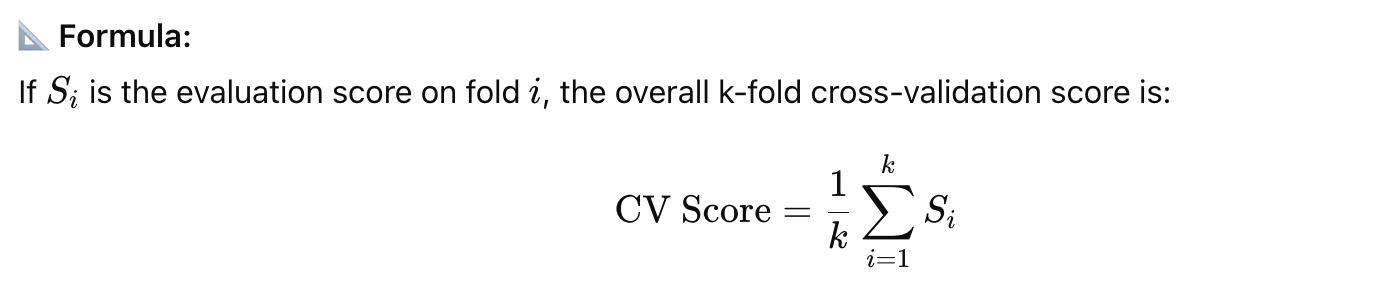

In [66]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)
model = LogisticRegression(max_iter=200)

# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Average score: 0.9733333333333334


#### Interpretation:

Higher average score → better model generalization.

Individual fold scores help identify variance in performance across subsets.

Useful for comparing models or tuning hyperparameters reliably.

### 📏 Mean Absolute Error (MAE)

📘 Definition:
Mean Absolute Error is the average of the absolute differences between predicted values and actual values. It measures prediction accuracy by quantifying the magnitude of errors without considering their direction, making it a straightforward and interpretable metric.

🔧 When to Use:
When you want a simple error metric that treats all deviations equally, giving a clear sense of average prediction error.

🌍 Where to Use:
In regression problems across finance, healthcare, and engineering where understanding the average prediction deviation is important.

💡 Use Case:
Predicting house prices and measuring the average difference between actual and predicted prices in dollars, without penalizing over- or underestimates differently.

⚠️ Limitations:

- Does not penalize larger errors more than smaller ones, which may underrepresent extreme deviations.

- Less sensitive to outliers compared to MSE, which can be good or bad depending on context.

✅ Advantages:

- Simple to compute and interpret.

- Maintains the same units as the target variable, making results easily understandable.

- Robust to outliers compared to squared-error metrics.

❓ Why is it Used?:
To provide an easily interpretable measure of average model error while avoiding the squaring effect used in metrics like MSE, which can exaggerate large errors.

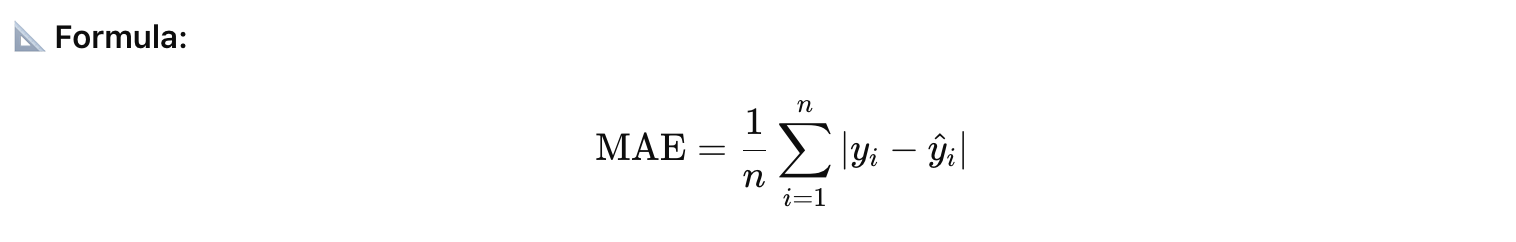

In [52]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

MAE: 0.5


#### Interpretation:

MAE = 0 → perfect predictions, no error.

Lower MAE → better model performance.

Represents the average absolute deviation in the same units as the target variable.

### Mean Squared Error (MSE)

📘 Definition:
MSE measures the average of the squares of the differences between predicted values and actual values. Squaring the errors penalizes larger deviations more heavily, making MSE sensitive to outliers.

🔧 When to Use:

When large errors should be penalized more than smaller ones.

In regression tasks where minimizing overall prediction error is important.

🌍 Where to Use:

Predicting house prices, stock prices, or energy consumption.

Any regression scenario where the magnitude of errors matters.

💡 Use Case:
A model predicts the prices of houses. If the actual price is $300,000 and the prediction is $310,000, the squared error contributes $100,000,000 to the MSE, highlighting large deviations.

⚠️ Limitations:

Sensitive to outliers; extreme errors dominate the metric.

Units are squared, making interpretation less intuitive than MAE.

✅ Advantages:

Differentiable, making it suitable for gradient-based optimization.

Strongly penalizes models that make large errors.

❓ Why is it Used?:
To provide a metric that emphasizes larger deviations and helps improve model accuracy by minimizing significant errors.

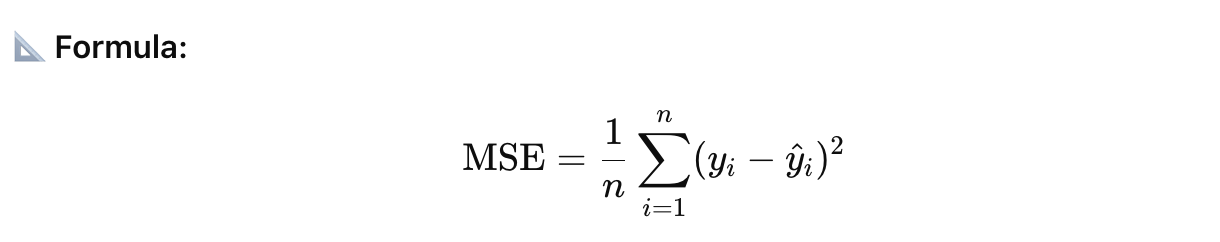

In [280]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

MSE: 0.375


### 📏 Coefficient of Determination (R²)
📘 Definition:
R², or the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It quantifies how well the regression model explains the variability of the observed data.

🔧 When to Use:
When you want to evaluate the goodness-of-fit of a regression model and understand how well it explains the observed outcomes.

🌍 Where to Use:
In regression tasks across statistics, economics, engineering, and scientific research to assess the predictive strength of models.

💡 Use Case:
Predicting housing prices using square footage, number of bedrooms, and location — R² indicates what fraction of the price variance the model accounts for.

⚠️ Limitations:

- Can be misleading for non-linear models if the relationship is not captured properly.

- Adding more variables, even irrelevant ones, can artificially inflate R² (Adjusted R² is better in that case).

✅ Advantages:

- Provides an easily interpretable value between 0 and 1.

- Higher R² indicates better explanatory power of the model.

- Helps compare the fit of different regression models.

❓ Why is it Used?:
To quantify the proportion of variance in the target variable explained by the model, offering a single, interpretable measure of model performance.

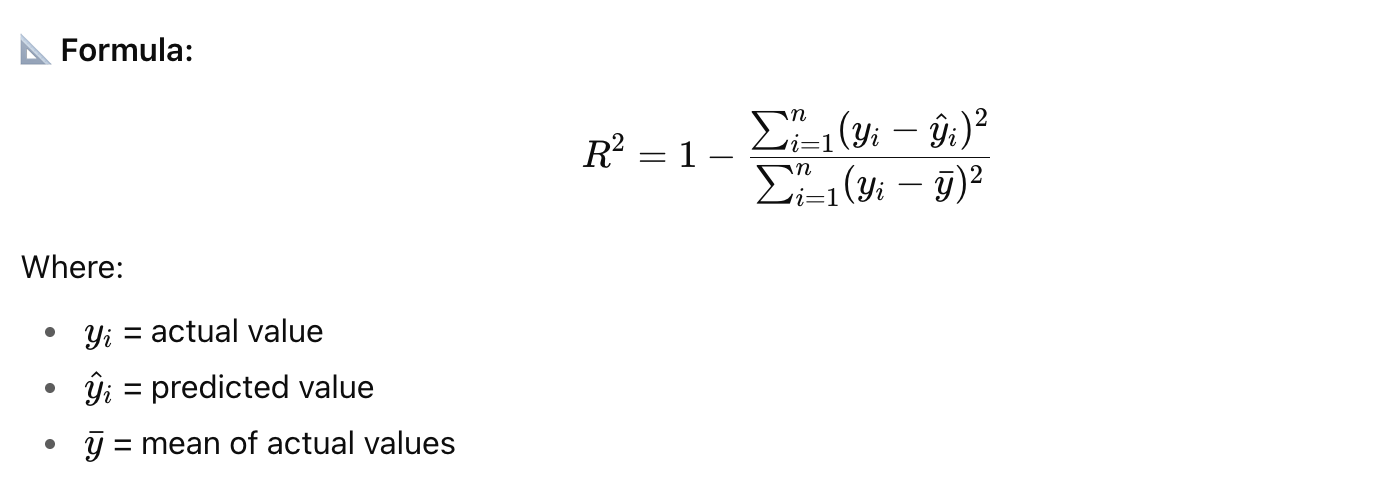

In [19]:
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2 = r2_score(y_true, y_pred)
print("R²:", r2)

R²: 0.9486081370449679


#### Interpretation:

R² = 1 → perfect fit; all variance explained.

R² = 0 → model explains none of the variance; equivalent to predicting the mean.

R² < 0 → model performs worse than predicting the mean (rare but possible with poorly fitted models).

## Classification

Classification is a type of supervised learning task where the goal is to predict discrete class labels for given input data. Unlike regression, which predicts continuous values, classification assigns data points to categories.

### Accuracy

📘 Definition:
Accuracy measures the proportion of correctly predicted observations (both true positives and true negatives) out of the total observations. It provides a general overview of model correctness but does not differentiate between types of errors.

🔧 When to Use:

- When classes are roughly balanced.

- When all types of misclassification (false positives and false negatives) are equally important.

🌍 Where to Use:

- Spam detection with roughly equal spam and non-spam emails.

- Image classification where all categories are similarly represented.

💡 Use Case:
If a model predicts 90 out of 100 emails correctly as spam or not spam, the accuracy is 90%.

⚠️ Limitations:

- Misleading on imbalanced datasets (e.g., 95% of data is negative → predicting all negative gives 95% accuracy).

- Ignores error types, providing no insight into false positives or false negatives.

✅ Advantages:

- Simple to compute and understand.

- Gives a quick overview of model performance.

❓ Why is it Used?:
To get an initial evaluation of model performance before considering more nuanced metrics.

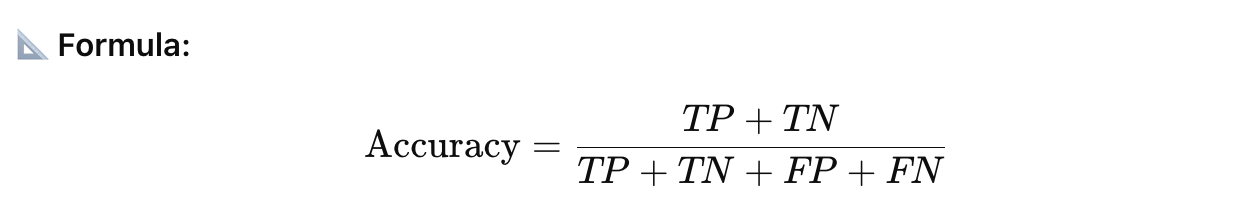

In [113]:
from sklearn.metrics import accuracy_score

y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1]

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


### Precision

📘 Definition:
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: “Of all the instances labeled positive, how many are actually positive?”

🔧 When to Use:

- When false positives are costly.

- Spam filtering, fraud detection, medical testing where incorrect positive identification has consequences.

🌍 Where to Use:

- Fraud detection where wrongly labeling a transaction as fraud may inconvenience customers.

- Spam detection where marking legitimate email as spam is undesirable.

💡 Use Case:
If a spam detector predicts 10 emails as spam but only 8 are truly spam, precision is 80%.

⚠️ Limitations:

- Does not consider false negatives; may miss important positive cases.

- Should be paired with recall for a balanced view.

✅ Advantages:

- Focuses on positive prediction quality.

- Useful in high-stakes applications where false positives matter.

❓ Why is it Used?:
To measure the reliability and correctness of positive predictions specifically.

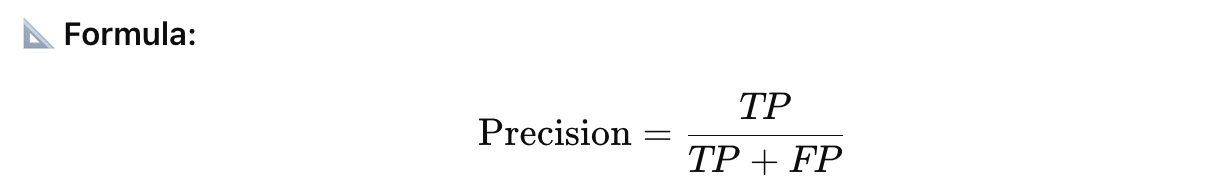

In [116]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
print("Precision:", precision)

Precision: 1.0


### Recall (Sensitivity / True Positive Rate)

📘 Definition:
Recall is the ratio of correctly predicted positive observations to all actual positives. It answers: “Of all actual positive instances, how many did the model correctly identify?”

🔧 When to Use:

- When missing positive cases is critical.

- Medical diagnosis, safety alerts, fraud detection.

🌍 Where to Use:

- Cancer detection: failing to identify a cancer patient can have severe consequences.

- Fraud detection where missing fraudulent activity is costly.

💡 Use Case:
If there are 10 actual spam emails and the model identifies 8 correctly, recall is 80%.

⚠️ Limitations:

Does not consider false positives; can lead to many false alarms if recall is maximized alone.

✅ Advantages:

- Measures model sensitivity.

- Vital for imbalanced datasets where positive cases are rare.

❓ Why is it Used?:
To evaluate the model’s ability to capture actual positive cases and reduce false negatives.

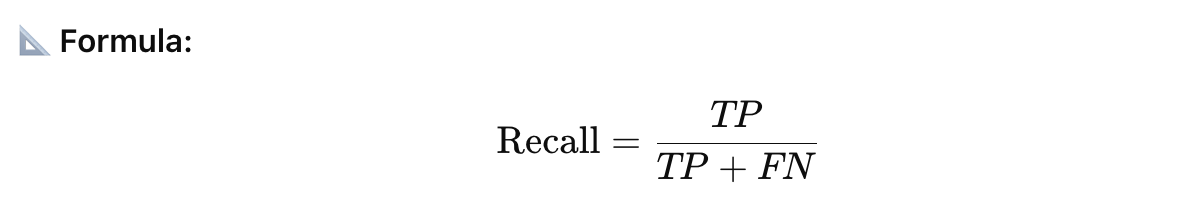

In [120]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
print("Recall:", recall)

Recall: 0.6666666666666666


### F1-Score

📘 Definition:
F1-score is the harmonic mean of precision and recall. It balances both metrics, providing a single number to evaluate positive class performance when both false positives and false negatives matter.

🔧 When to Use:

- Imbalanced datasets.

- When a balance between false positives and false negatives is needed.

🌍 Where to Use:

- Credit card fraud detection.

- Medical diagnosis with rare positive cases.

💡 Use Case:
If a fraud detection model has 70% precision and 80% recall, F1-score combines these to 74.8% (harmonic mean).

⚠️ Limitations:

- Does not differentiate between classes in multi-class settings unless weighted.

✅ Advantages:

- Single metric that balances precision and recall.

- Useful for evaluating imbalanced datasets.

❓ Why is it Used?:
To give a comprehensive view of model performance on the positive class.

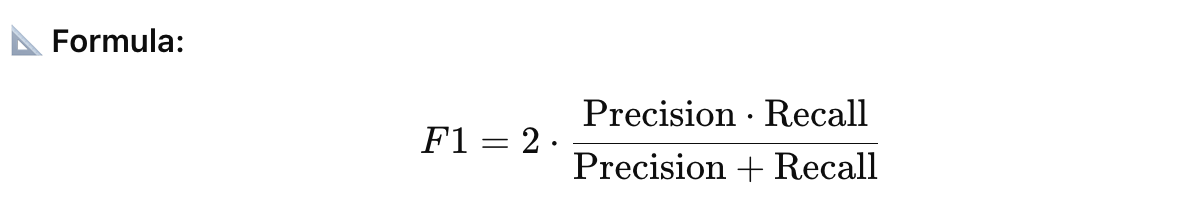

In [123]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8


### ROC-AUC (Receiver Operating Characteristic – Area Under Curve)

📘 Definition:
ROC-AUC evaluates a classifier’s ability to distinguish between classes across all classification thresholds. ROC plots True Positive Rate (Recall) vs. False Positive Rate (FPR), and AUC measures overall separability.

🔧 When to Use:

Binary classifiers, especially with imbalanced classes.

When evaluating probability-based predictions rather than hard class labels.

🌍 Where to Use:

Credit scoring, medical diagnosis, fraud detection, any problem with class imbalance.

💡 Use Case:
A credit model predicts probabilities of default. ROC-AUC assesses how well it ranks defaulters higher than non-defaulters.

⚠️ Limitations:

- Does not indicate exact error costs.

- May be misleading for extremely imbalanced datasets without proper calibration.

✅ Advantages:

- Threshold-independent metric.

- Summarizes trade-off between sensitivity and specificity.

❓ Why is it Used?:
To measure the model’s overall ability to rank positive instances higher than negative instances.

📐 Key Concepts:

- True Positive Rate (TPR) = TP / (TP + FN)

- False Positive Rate (FPR) = FP / (FP + TN)

- AUC = Area under ROC curve

In [126]:
from sklearn.metrics import roc_auc_score

y_scores = [0.1, 0.9, 0.8, 0.3, 0.7]  # predicted probabilities
roc_auc = roc_auc_score(y_true, y_scores)
print("ROC-AUC:", roc_auc)

ROC-AUC: 1.0


## Hands-on

### Practice on a dataset (sklearn.datasets.load_breast_cancer)

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#### Import Libraries
Import essential libraries for data manipulation, visualization, preprocessing, modeling, and evaluation.
RandomForestClassifier is used as the machine learning model.

In [189]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
print("Dataset shape:", X.shape)
print("Target classes:", np.unique(y))

Dataset shape: (569, 30)
Target classes: [0 1]


#### Load Dataset
Load the Breast Cancer dataset from scikit-learn.     
X contains features (columns).     
y contains the target (0 = benign, 1 = malignant).

In [195]:
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)  # StandardScaler

scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)    # MinMaxScaler

#### Scaling

StandardScaler: Standardizes features to mean=0, std=1.    
MinMaxScaler: Scales features to range [0,1].    
Scaling is useful for models sensitive to feature magnitude.    

In [199]:
X['diagnosis_type'] = np.random.choice(['A', 'B'], size=X.shape[0])
encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(X[['diagnosis_type']])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(['diagnosis_type']))
X_final = pd.concat([X.drop('diagnosis_type', axis=1), encoded_df], axis=1)

#### One-Hot Encoding

Adds a dummy categorical column (diagnosis_type) to demonstrate one-hot encoding.     
OneHotEncoder converts categorical column into numeric dummy columns.     
Combines encoded columns with original data (X_final).

In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)

#### Train/Test Split
Splits dataset into 70% training and 30% testing.     
stratify=y ensures class distribution is preserved.

In [208]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Model Training
Train a Random Forest classifier on the training data.

In [212]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#### Predictions
y_pred → Predicted class labels.    
y_prob → Predicted probability of positive class (used for ROC curve).

In [214]:
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 58   6]
 [  3 104]]


### Implement confusion matrix & ROC curve manually

#### Confusion Matrix
Manually calculates True Positives, True Negatives, False Positives, False Negatives.    
Organizes them in a 2x2 confusion matrix:

In [216]:
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    TP = np.sum((y_test == 1) & (y_thresh == 1))
    TN = np.sum((y_test == 0) & (y_thresh == 0))
    FP = np.sum((y_test == 0) & (y_thresh == 1))
    FN = np.sum((y_test == 1) & (y_thresh == 0))
    
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)


#### ROC Curve
Calculates True Positive Rate (TPR) and False Positive Rate (FPR) for different thresholds.     
Used to plot the ROC curve.

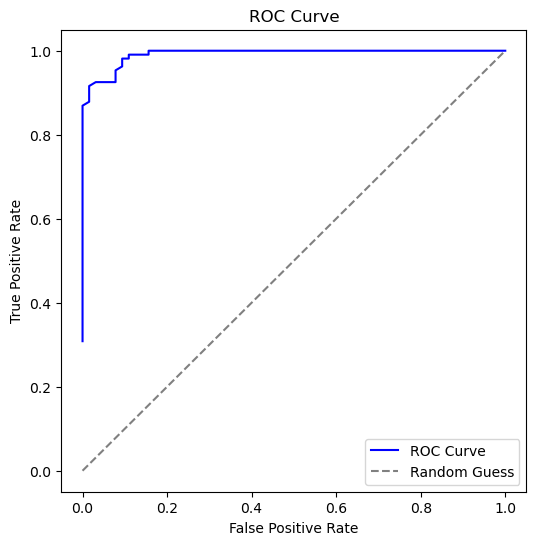

In [232]:
plt.figure(figsize=(6,6))
plt.plot(fpr_list, tpr_list, label='ROC Curve', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### ROC curve graph
Visualizes model performance across thresholds.
Diagonal line = random guessing.

In [241]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.9473684210526315
Precision: 0.9454545454545454
Recall: 0.9719626168224299
F1-score: 0.9585253456221198
ROC-AUC: 0.9918954439252337


#### Evaluation Metrics
Calculates key classification metrics:

- Accuracy: Overall correct predictions

- Precision: TP / (TP + FP)

- Recall: TP / (TP + FN)

- F1-score: Harmonic mean of precision & recall

- ROC-AUC: Area under ROC curve

In [237]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_final, y, cv=kf, scoring='accuracy')
print("5-Fold Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

5-Fold Cross-validation Accuracy Scores: [0.96491228 0.96491228 0.95614035 0.96491228 0.95575221]
Mean CV Accuracy: 0.9613258810743673


#### Cross-Validation (5-Fold)

Performs 5-Fold cross-validation:

- Splits data into 5 folds, trains on 4 folds, tests on 1 fold, repeats 5 times.

- cv_scores → Accuracy for each fold.

- cv_scores.mean() → Overall estimated model performance.